In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")

inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [5]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x9638350>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [10]:
# Find the most recent date in the data set.
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23')

In [16]:

test = list(np.ravel(results))
jsonify(results)

RuntimeError: Working outside of application context.

This typically means that you attempted to use functionality that needed
to interface with the current application object in some way. To solve
this, set up an application context with app.app_context().  See the
documentation for more information.

Text(0, 0.5, 'Inches')

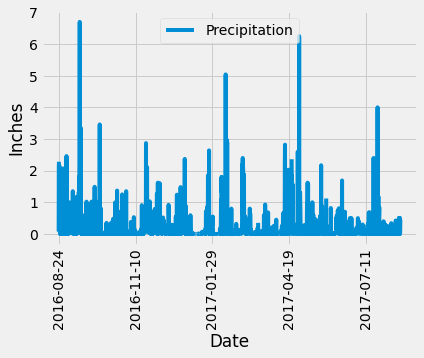

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
import datetime as dt

# Starting from the most recent data point in the database. 
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)


# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date,measurement.prcp).\
    filter(measurement.date >= query_date).\
    order_by(measurement.date).all()

date = [result[0] for result in results]
precipitation = [result[1] for result in results]

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
# df.set_index('Date', inplace=True)
df.head(10)

# Sort the dataframe by date
df.sort_values('Date', ascending=False)
df.plot(x='Date',y='Precipitation', rot=90)
plt.ylabel('Inches')




# Use Pandas Plotting with Matplotlib to plot the data
# n = 200
# ax = df.plot.bar()
# ticks = ax.xaxis.get_ticklocs()
# ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
# ax.xaxis.set_ticks(ticks[::n])
# ax.xaxis.set_ticklabels(ticklabels[::n])
# ax.figure.show()



In [1]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

NameError: name 'df' is not defined

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(station.station).count()
stations_count

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, 
       func.min(measurement.tobs), 
       func.max(measurement.tobs),
       func.avg(measurement.tobs)]
most_active_stats = session.query(*sel).\
    filter(measurement.station == 'USC00519281').\
    group_by(measurement.station).\
    order_by(measurement.tobs).all()
most_active_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

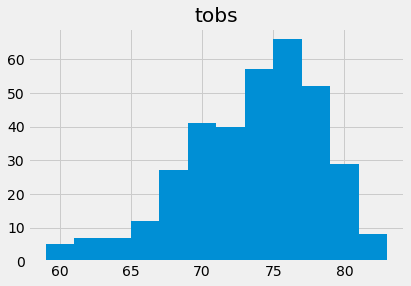

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= query_date).\
    order_by(measurement.date.desc()).all()

df = pd.DataFrame(station_temp)
df.hist(bins=12)




# Close session

In [74]:
# Close Session
session.close()